In [2]:
# !pip install numpy
# !pip install pandas
# !pip install keras
# !pip install graphviz
# !pip install pydot

In [21]:
import numpy as np
np.random.seed(42) # for reproducibility
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
%matplotlib inline  
import app_utils as u
from imp import reload
reload(u);

In [3]:
df_train,df_val,categories = u.read_dbpedia_data()

In [4]:
#Load Glove 50-d embeddings
embeddings,word_index = u.load_embeddings()

In [5]:
#Prepare the data for the model
x_train,y_train,x_val,y_val = u.prepare_data_from_full_word_index(df_train,df_val,categories,word_index)

In [6]:
print(x_train.shape,y_train.shape)

(560000, 20) (560000, 14)


In [22]:
# Get the embedding matrix for the model, build model, display model summary
embedding_matrix = u.get_embedding_matrix_for_model(embeddings,word_index)
model = u.build_model(embedding_matrix,categories)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            20000050  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 128)           58880     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                910       
Total params: 20,166,912
Trainable params: 166,862
Non-trainable params: 20,000,050
_________________________________________________________________


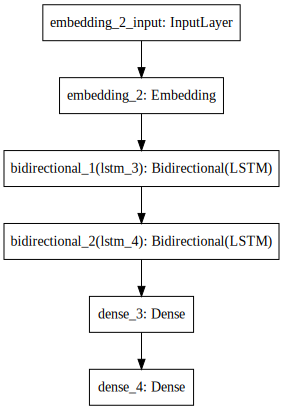

In [23]:
# Display the Model
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [28]:
# Train the model, record history
idx = np.arange(len(x_train))
np.random.shuffle(idx)

history = model.fit(x_train[idx], y_train[idx],
                    epochs=5,
                    batch_size=1024,
                    shuffle=False,
                    validation_data=(x_val, y_val))

Train on 560000 samples, validate on 70000 samples
Epoch 1/5
560000/560000 [==============================] - 242s 433us/step - loss: 0.7814 - acc: 0.7562 - val_loss: 0.4986 - val_acc: 0.8403
Epoch 2/5
560000/560000 [==============================] - 253s 451us/step - loss: 0.4545 - acc: 0.8525 - val_loss: 0.4218 - val_acc: 0.8641
Epoch 3/5
560000/560000 [==============================] - 244s 436us/step - loss: 0.4018 - acc: 0.8696 - val_loss: 0.3921 - val_acc: 0.8731
Epoch 4/5
560000/560000 [==============================] - 244s 436us/step - loss: 0.3719 - acc: 0.8791 - val_loss: 0.3745 - val_acc: 0.8796
Epoch 5/5
560000/560000 [==============================] - 244s 436us/step - loss: 0.3508 - acc: 0.8861 - val_loss: 0.3634 - val_acc: 0.8832


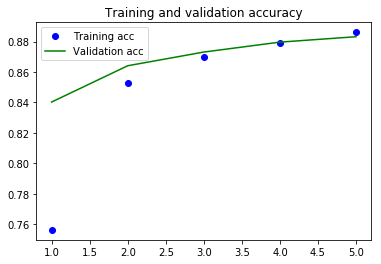

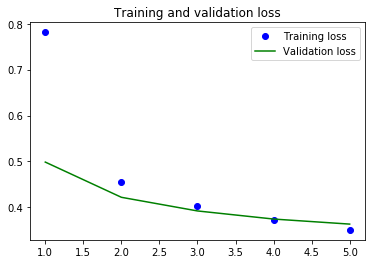

In [29]:
# This plot suggests there is still value in the data that has not been exploited. 
# (We want to get to a stage where we overfit first, and then regularize down)
u.make_history_plot(history)

In [30]:
# Make and analyze validation predictions
val_predictions = u.one_hot_to_category_idx(model.predict(x_val))

In [31]:
conf_mat = confusion_matrix(list(df_val.category.values-1),val_predictions)
print(conf_mat)

[[3852   76  120   17   71  213  176   23    4    9   21  130   49  239]
 [  87 4516   24   11   71   13  170   23   13    0    8    1    7   56]
 [  73   48 3881   27  212   20   46    0    2    5    5  247   86  348]
 [  10   27   99 4716   80   14    7    1    0    6    0    4   13   23]
 [  48   60  162   35 4554   36   34    3    2    2    1    2    4   57]
 [ 139   13    8   10   31 4676   34   30    4   15    3    3    9   25]
 [ 141  194   44    1   90   80 4198  100   26   12    9    9   13   83]
 [  33   27    9    0   16   54  110 4599   30   53   39    1    1   28]
 [   9   22    7    1   16    6   50   65 4802    7    3    1    1   10]
 [  12    0    9   20    2   18    3   33    2 4618  264    2    2   15]
 [  24    4    4    0    2    8   16   30    1  268 4619    0    0   24]
 [  38    4  304    6    3   10   13    0    0    3    1 4467   80   71]
 [  42   15  128    4   23   23   21    8    3    3    3  100 4167  460]
 [ 132   63  168   11   80   27   46   13    3   14

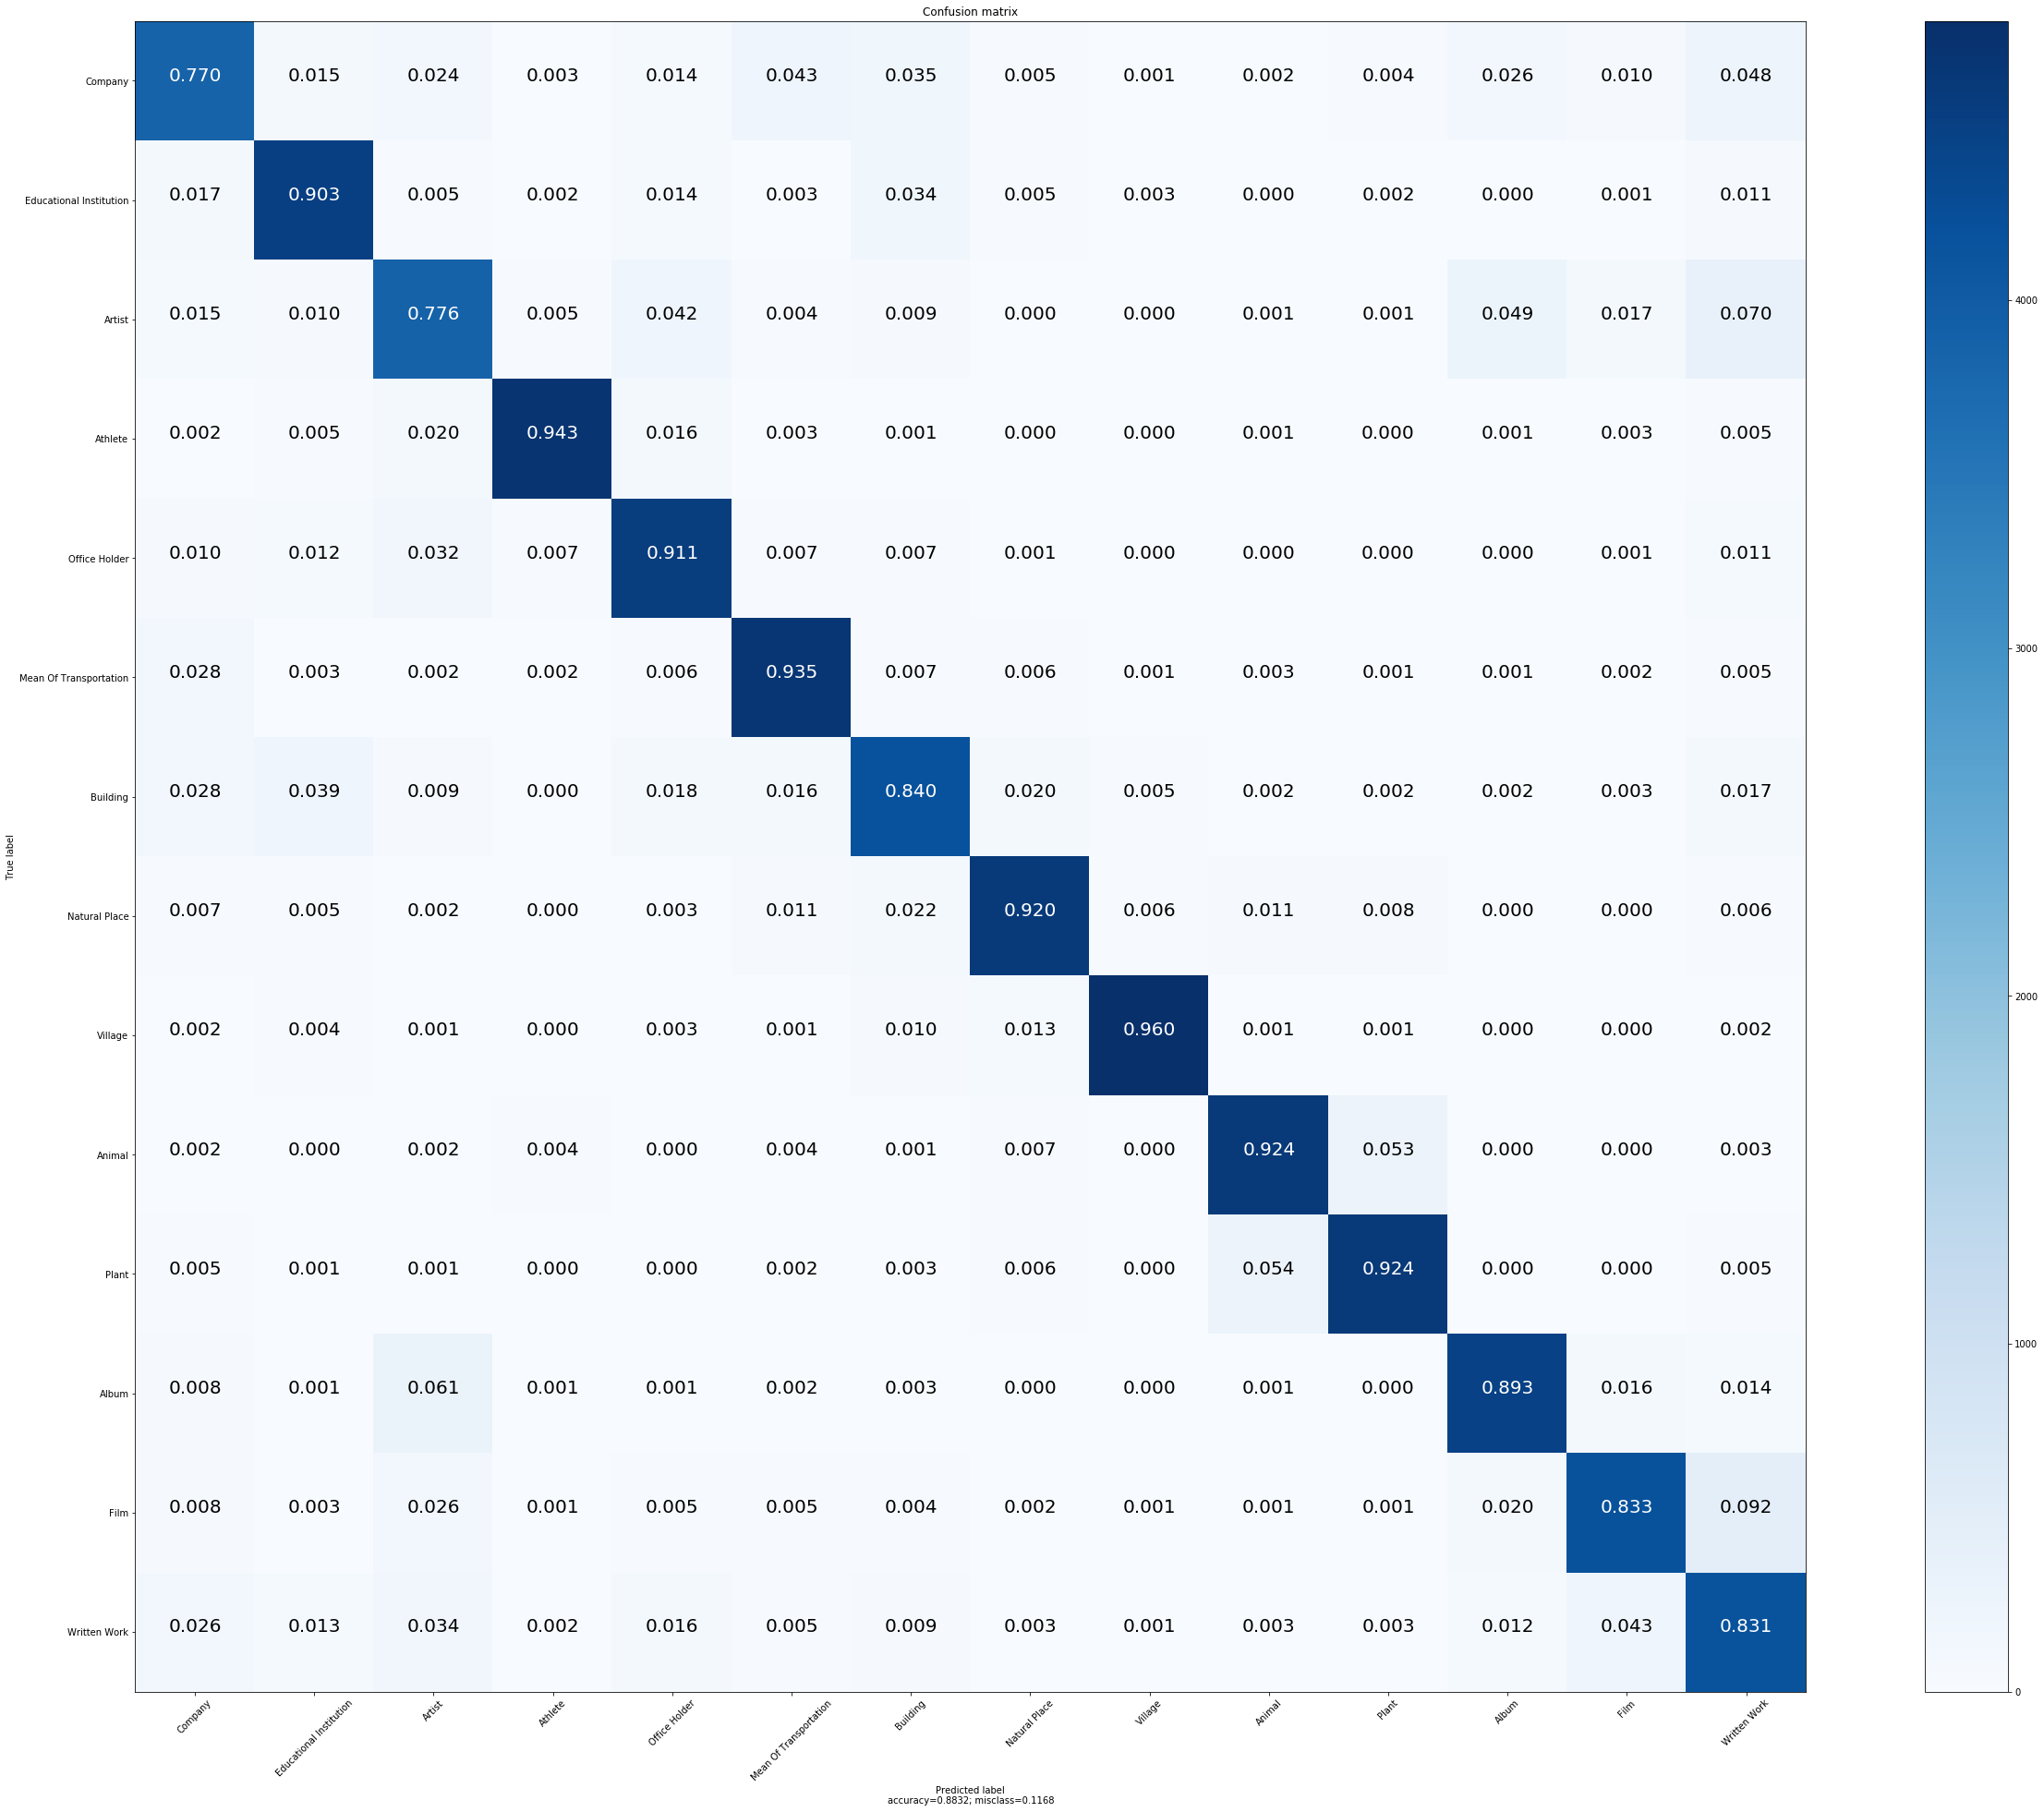

In [32]:
u.plot_confusion_matrix(conf_mat,target_names=categories,normalize=True)

In [33]:
print(classification_report(list(df_val.category.values-1), val_predictions, None, categories))

                         precision    recall  f1-score   support

                Company       0.83      0.77      0.80      5000
Educational Institution       0.89      0.90      0.90      5000
                 Artist       0.78      0.78      0.78      5000
                Athlete       0.97      0.94      0.96      5000
          Office Holder       0.87      0.91      0.89      5000
 Mean Of Transportation       0.90      0.94      0.92      5000
               Building       0.85      0.84      0.85      5000
          Natural Place       0.93      0.92      0.93      5000
                Village       0.98      0.96      0.97      5000
                 Animal       0.92      0.92      0.92      5000
                  Plant       0.93      0.92      0.92      5000
                  Album       0.89      0.89      0.89      5000
                   Film       0.90      0.83      0.86      5000
           Written Work       0.74      0.83      0.78      5000

            avg / total